<a href="https://colab.research.google.com/github/soohyoen/artificial-intelligence/blob/main/%EB%94%A5%EB%9F%AC%EB%8B%9D_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

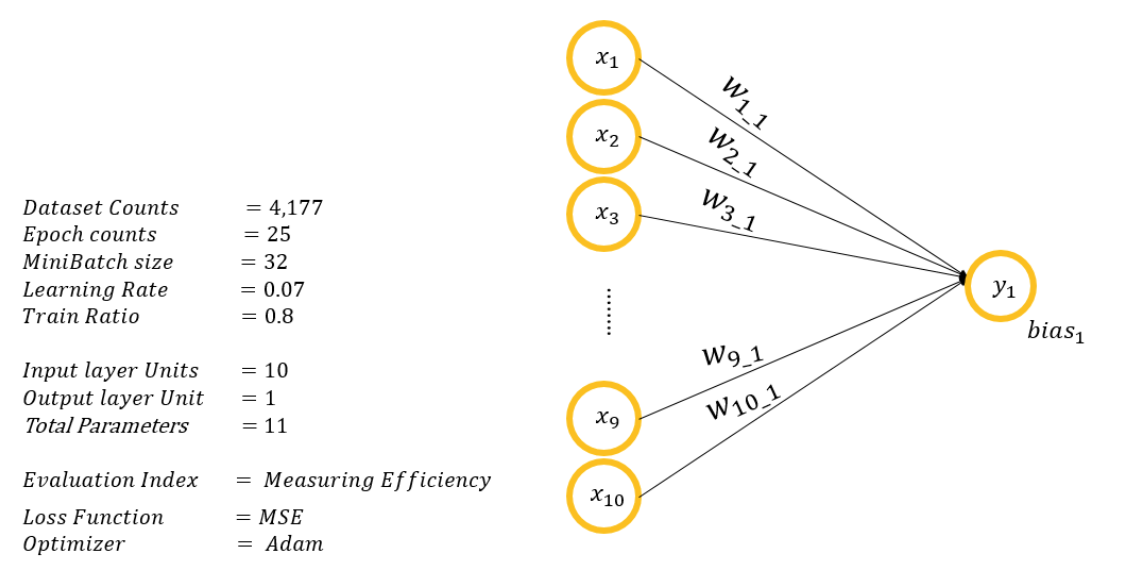

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/abalone_mini.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             10 non-null     object 
 1   Length          10 non-null     float64
 2   Diameter        10 non-null     float64
 3   Height          10 non-null     float64
 4   Whole weight    10 non-null     float64
 5   Shucked weight  10 non-null     float64
 6   Viscera weight  10 non-null     float64
 7   Shell weight    10 non-null     float64
 8   Rings           10 non-null     int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 848.0+ bytes


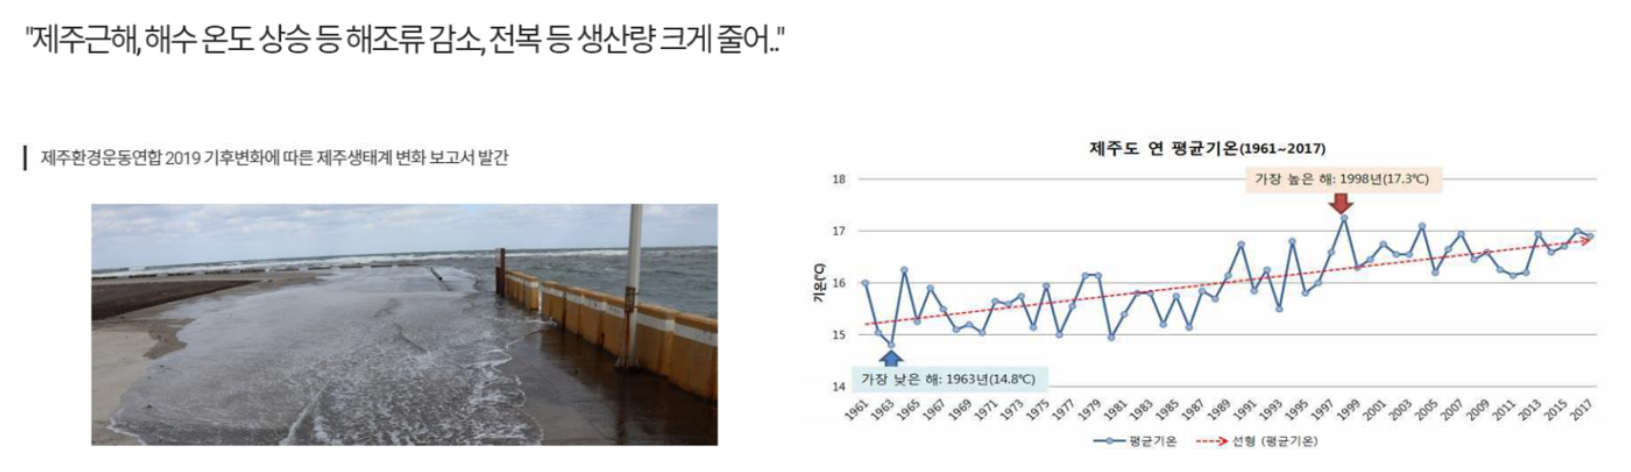

##### 데이터 불러오기
##### 데이터 분할하기
##### 파라미터 생성하기
##### 신경망 연산하기
##### 역전파 연산하기 
##### 성능 확인하기

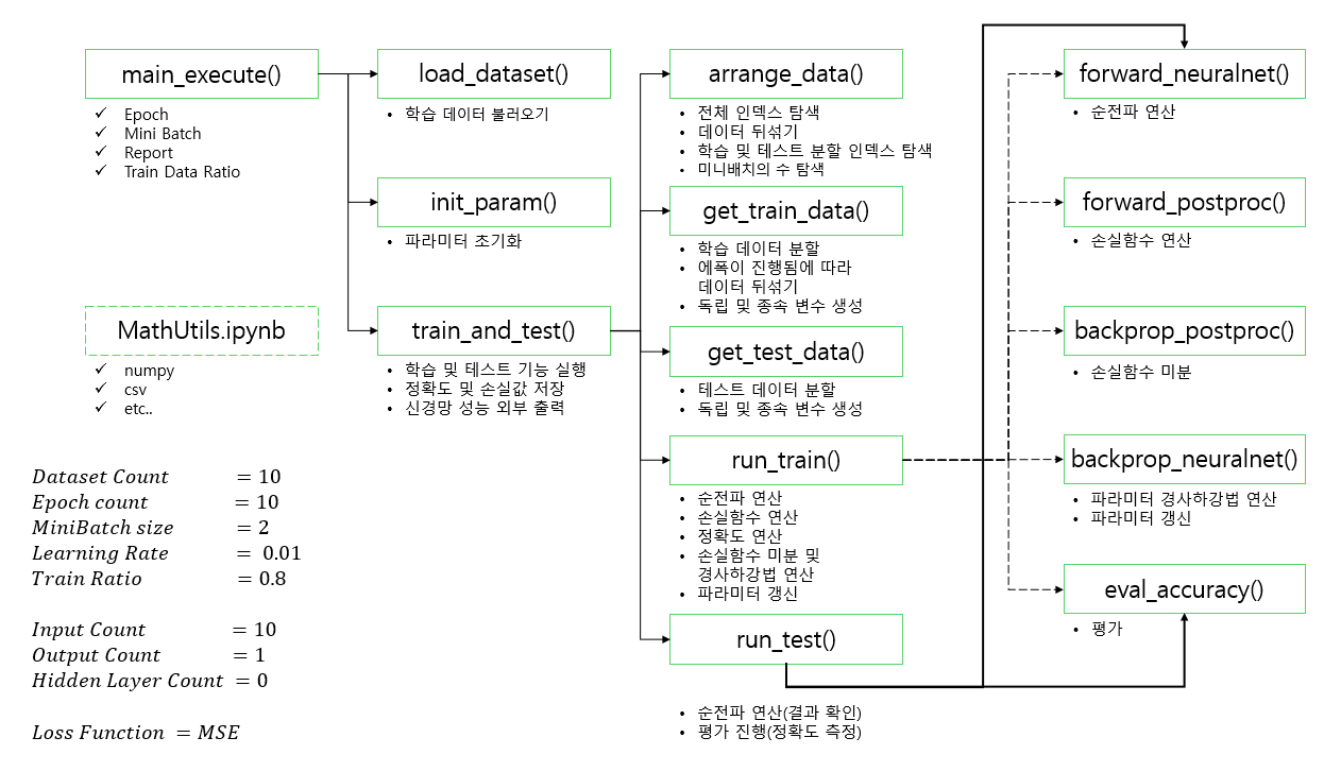

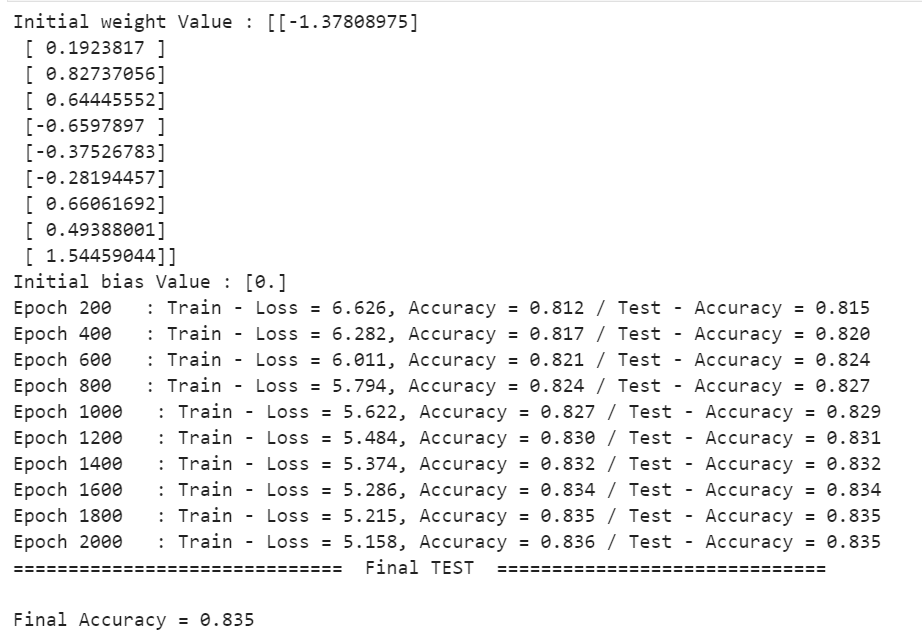

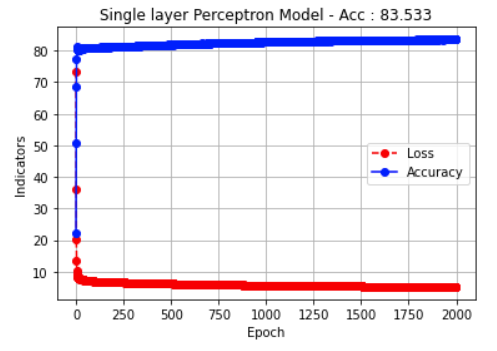


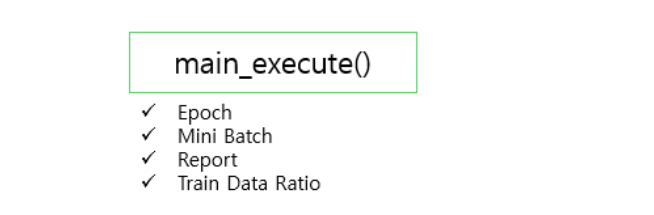

In [ ]:
def main_execute(epoch_count =10, mb_size=2, report =2, train_ratio=0.8):
    load_dataset()
    weight_initial, bias_initial = init_param()
    losses_mean_row , accs_mean_row , final_acc = train_and_test(epoch_count, mb_size, report, train_ratio)

    return weight_initial, bias_initial,losses_mean_row , accs_mean_row , final_acc

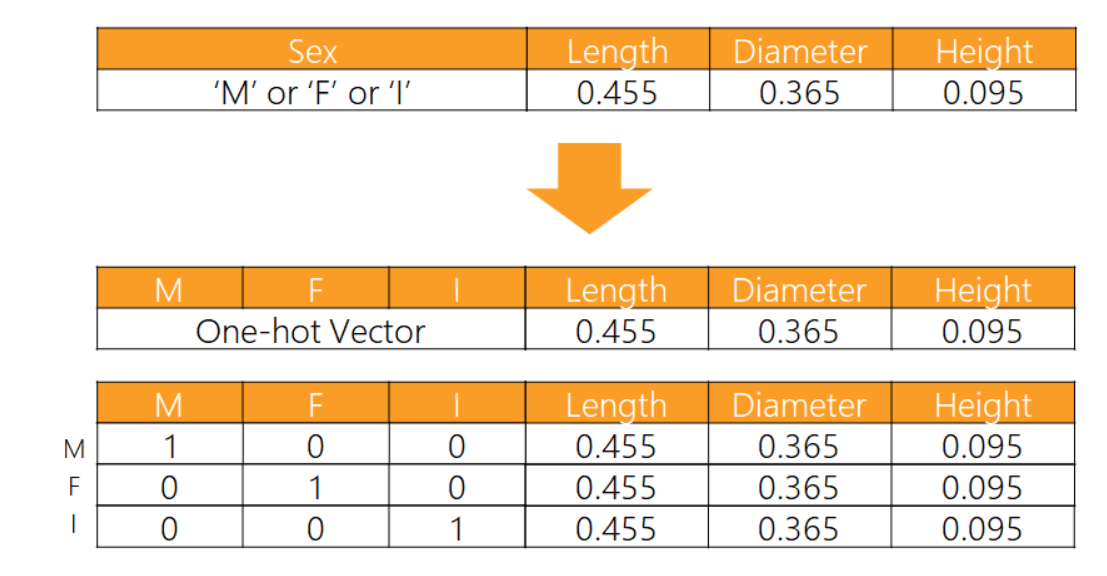

In [ ]:
def load_dataset():
    with open('/content/abalone_mini.csv') as csvfile:
        csvreader = csv.reader(csvfile)
        next(csvreader)
        rows = []
        for row in csvreader:
            rows.append(row)
    
    global data,input_cnt,output_cnt

    input_cnt,output_cnt = 10,1
    data = np.zeros([ len(rows) ,input_cnt + output_cnt])

    for n,row in enumerate(rows):
        if row[0] == 'M' : data[n,0] = 1        # 원핫벡터 코드
        if row[0] == 'F' : data[n,1] = 1
        if row[0] == 'I' : data[n,2] = 1
        data[n , 3:] = row[1 : ]
        

In [ ]:
# csv를 다른파일을 만들어 넣어준다.

%run /content/MathUtils.ipynb

load_dataset()

In [ ]:
print(data)

[[ 1.      0.      0.      0.455   0.365   0.095   0.514   0.2245  0.101
   0.15   15.    ]
 [ 1.      0.      0.      0.35    0.265   0.09    0.2255  0.0995  0.0485
   0.07    7.    ]
 [ 0.      1.      0.      0.53    0.42    0.135   0.677   0.2565  0.1415
   0.21    9.    ]
 [ 1.      0.      0.      0.44    0.365   0.125   0.516   0.2155  0.114
   0.155  10.    ]
 [ 0.      0.      1.      0.33    0.255   0.08    0.205   0.0895  0.0395
   0.055   7.    ]
 [ 1.      0.      0.      0.5     0.4     0.13    0.6645  0.258   0.133
   0.24   12.    ]
 [ 0.      0.      1.      0.355   0.28    0.085   0.2905  0.095   0.0395
   0.115   7.    ]
 [ 0.      1.      0.      0.44    0.34    0.1     0.451   0.188   0.087
   0.13   10.    ]
 [ 1.      0.      0.      0.365   0.295   0.08    0.2555  0.097   0.043
   0.1     7.    ]
 [ 1.      0.      0.      0.45    0.32    0.1     0.381   0.1705  0.075
   0.115   9.    ]]


In [ ]:
#파라미터 초기화

def init_param():

    global weight, bias 
    weight_initial = []
    bias_initial = []
    weight = np.random.normal(RND_MEAN, RND_STD,
                              size = [input_cnt,output_cnt])
    bias = np.zeros([output_cnt])

    print('Initial Weight Value : \n{}'.format(weight))
    print('Initial Bias Value : \n{}'.format(bias))

    weight_initial.append(weight)
    bias_initial.append(bias)

    return weight_initial,bias_initial

In [ ]:
weightweight_initial, bias_initial = init_param()

Initial Weight Value : 
[[-0.03414996]
 [-0.01335083]
 [-0.05454462]
 [ 0.05834354]
 [ 0.054761  ]
 [ 0.06605431]
 [-0.01512019]
 [-0.00383978]
 [-0.05325596]
 [-0.00528789]]
Initial Bias Value : 
[0.]


In [ ]:
def trian_and_test():
    pass

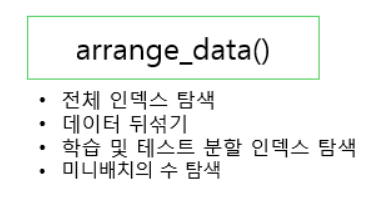

In [ ]:
def arrange_data(mb_size, train_ratio):
    global shuffle_map, test_begin_index 
    shuffle_map = np.arange(data.shape[0])
    np.random.shuffle(shuffle_map)

    mini_batch_step_count = int(data.shape[0] * train_ratio) // mb_size 
    test_begin_index = mini_batch_step_count * mb_size

    return mini_batch_step_count

In [ ]:
mini_batch_step_count = arrange_data(mb_size = 2, train_ratio = 0.8)

In [ ]:
print("mini_batch_step_count :", mini_batch_step_count)
print("shuffle_map :", shuffle_map[:3])
print("test_begin_index : ", test_begin_index)

mini_batch_step_count : 4
shuffle_map : [2 1 0]
test_begin_index :  8


In [ ]:
def get_test_data():
    test_data = data[shuffle_map[test_begin_index:]]
    return test_data[:,: -output_cnt],test_data[:,-output_cnt:]

In [ ]:
test_X,test_y = get_test_data()
print(test_X)
print('===========================================================================')
print(test_y)

[[0.     1.     0.     0.44   0.34   0.1    0.451  0.188  0.087  0.13  ]
 [1.     0.     0.     0.5    0.4    0.13   0.6645 0.258  0.133  0.24  ]]
[[10.]
 [12.]]


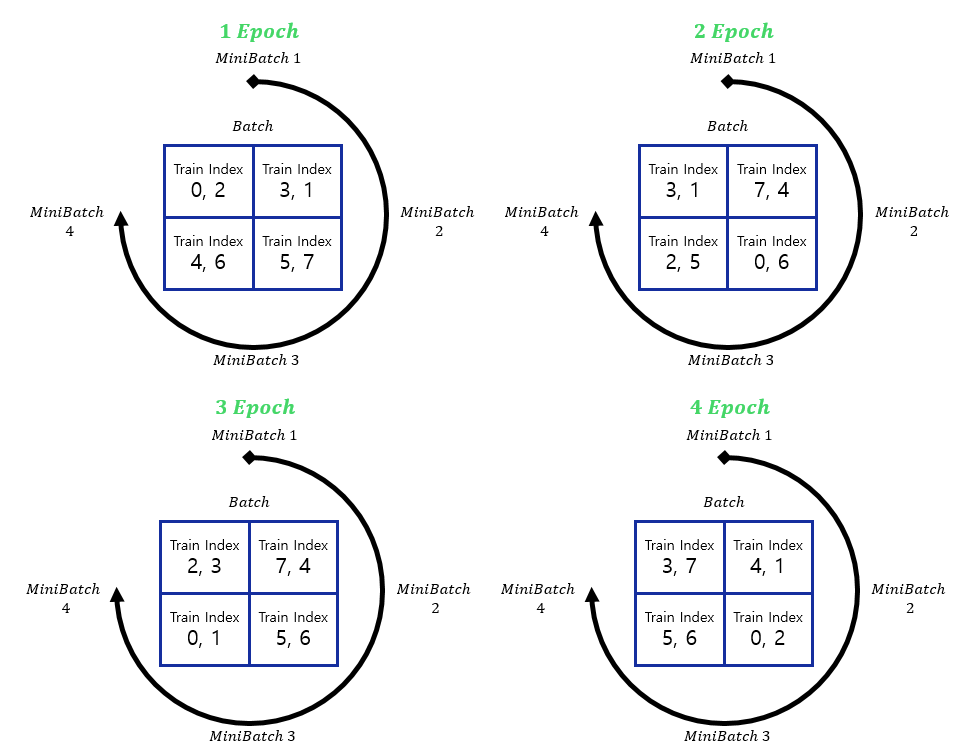

In [ ]:
def get_train_data(mb_size, n):
    if n == 0 :
        np.random.shuffle(shuffle_map[:test_begin_index])

    train_data = data[shuffle_map[mb_size * n : mb_size * (n+1)]]

    return train_data[:, : -output_cnt], train_data[:, -output_cnt : ]

In [ ]:
train_x, train_y = get_train_data(mb_size = 2 , n = 0)
print(train_x)
print("========================")
print(train_y)

[[1.     0.     0.     0.45   0.32   0.1    0.381  0.1705 0.075  0.115 ]
 [0.     1.     0.     0.53   0.42   0.135  0.677  0.2565 0.1415 0.21  ]]
[[9.]
 [9.]]


In [ ]:
# mb_size = 2
# train_data_mini_1 = data[shuffle_map[0:2]]
#train_data_mini_2 = data[shuffle_map[2:4]]
##train_data_mini_3 = data[shuffle_map[4:6]]
#train_data_mini_4 = data[shuffle_map[6:8]]

##train_data_mini_n = data[shuffle_map[mb_size*0 : mb_size * (0+1)]]
#train_data_mini_n = data[shuffle_map[mb_size*1 : mb_size * (1+1)]]
#train_data_mini_n = data[shuffle_map[mb_size*2 : mb_size * (2+1)]]
#train_data_mini_n = data[shuffle_map[mb_size*3 : mb_size * (3+1)]]

#train_data_mini_n = data[shuffle_map[mb_size*n : mb_size * (n+1)]]

In [ ]:
def run_train(x,y):
    loss = 0
    accuracy = 100
    return loss,accuracy

run_train(0,0)

(0, 100)

In [ ]:
def run_test(x,y):
    accuracy = 95
    return accuracy
    

In [ ]:
run_test(0,0)

95

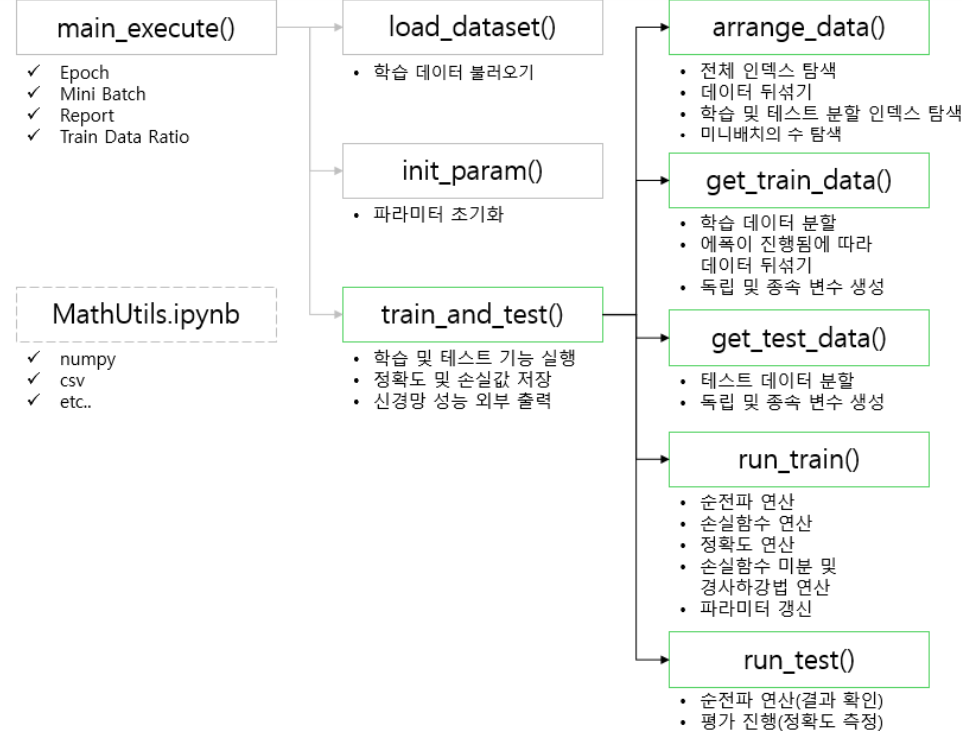

In [ ]:
def train_and_test(epoch_count, mb_size, report, train_ratio):
    mini_batch_step_count = arrange_data(mb_size, train_ratio)

    test_x, test_y = get_test_data()
    losses_mean_row, accs_mean_row  = [] ,[]

    for epoch in range(epoch_count):
        losses = []
        accs   = []
        for n in range(mini_batch_step_count):
            train_x ,train_y = get_train_data(mb_size, n)
            loss, acc = run_train(train_x, train_y)
            losses.append(loss)
            accs.append(acc)

        if report > 0 and(epoch +1) %report == 0:
            acc = run_test(test_x, test_y)
            print('Epoch {} : Train - Loss = {:.3f}, Accuracy = {:.3f} / Test - Accuracy = {:.3f}'.\
                  format(epoch +1 , np.mean(losses), np.mean(accs), acc))
            
        losses_mean = np.mean(losses)
        accs_mean = np.mean(accs) * 100

        losses_mean_row.append(losses_mean)
        accs_mean_row.append(accs_mean)      

    final_acc = run_test(test_x,test_y)
    print('='*30, 'Final TEST', '='*30)
    print('\nFinal Accuracy : {}'.format(final_acc))

    return losses_mean_row, accs_mean_row, final_acc

In [ ]:
losses_mean_row, accs_mean_row, final_acc = train_and_test(epoch_count =10, 
                                                           mb_size=10, 
                                                           report=1, 
                                                           train_ratio=0)

Epoch 1 : Train - Loss = nan, Accuracy = nan / Test - Accuracy = 0.906
Epoch 2 : Train - Loss = nan, Accuracy = nan / Test - Accuracy = 0.906
Epoch 3 : Train - Loss = nan, Accuracy = nan / Test - Accuracy = 0.906
Epoch 4 : Train - Loss = nan, Accuracy = nan / Test - Accuracy = 0.906
Epoch 5 : Train - Loss = nan, Accuracy = nan / Test - Accuracy = 0.906
Epoch 6 : Train - Loss = nan, Accuracy = nan / Test - Accuracy = 0.906
Epoch 7 : Train - Loss = nan, Accuracy = nan / Test - Accuracy = 0.906
Epoch 8 : Train - Loss = nan, Accuracy = nan / Test - Accuracy = 0.906
Epoch 9 : Train - Loss = nan, Accuracy = nan / Test - Accuracy = 0.906
Epoch 10 : Train - Loss = nan, Accuracy = nan / Test - Accuracy = 0.906
============================== Final TEST ==============================

Final Accuracy : 0.9062452102858624


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [ ]:
epoch_count=10
report =4

for epoch in range(epoch_count):
    print((epoch+1)%report == 0)

False
False
False
True
False
False
False
True
False
False


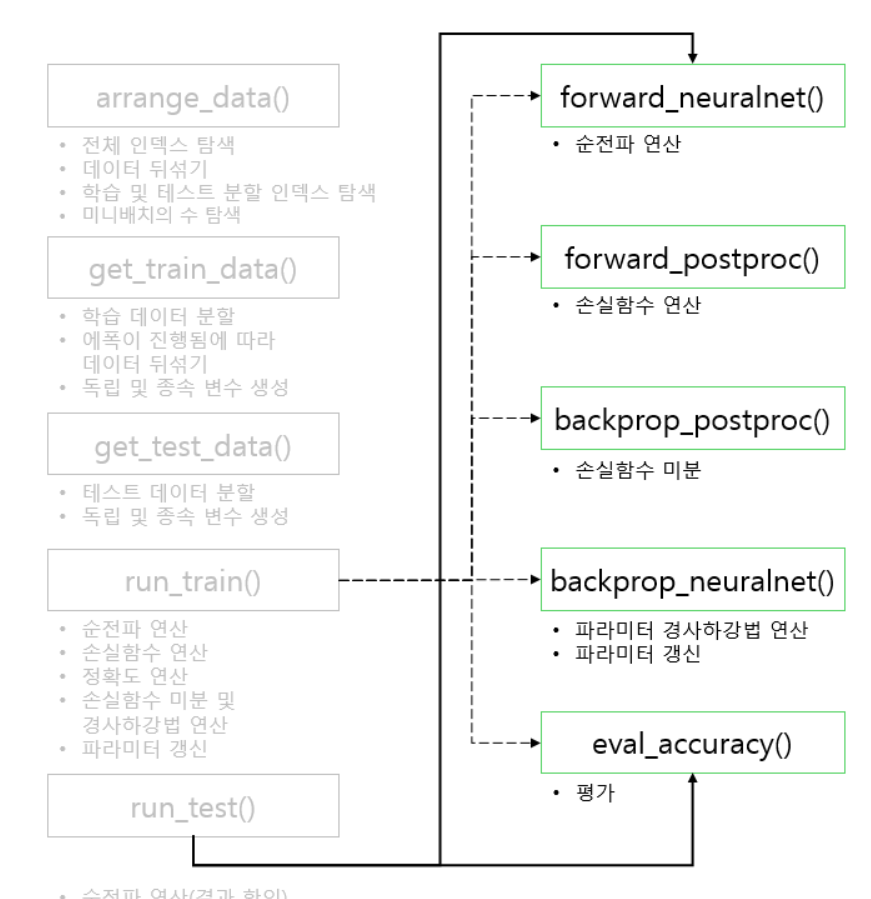

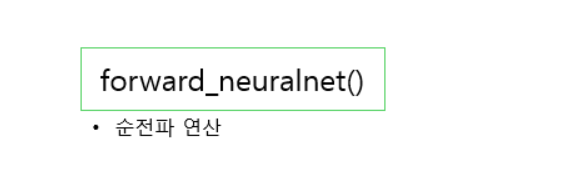

In [ ]:
def forward_neuralnet(x):
    y_hat = np.matmul(x,weight) + bias
    return y_hat ,x

In [ ]:
y_hat, _ = forward_neuralnet(train_x)
print(y_hat)
print(y_hat.shape)

[[ 8.85186663]
 [12.57028636]]
(2, 1)


In [ ]:
train_x.shape

(2, 10)

In [ ]:
weight.shape

(10, 1)

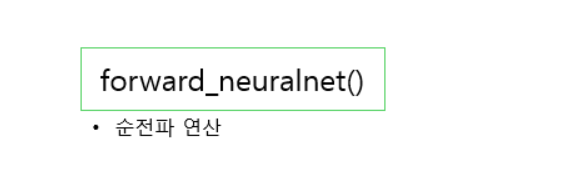

In [ ]:
def forward_postproc(y_hat,y):
    diff = y_hat - y
    square = np.square(diff)
    loss = np.mean(square)

    return loss,diff    

In [ ]:
loss,_ = forward_postproc(y_hat, train_y)
print('MSE : ',loss)

MSE :  6.38444409833538


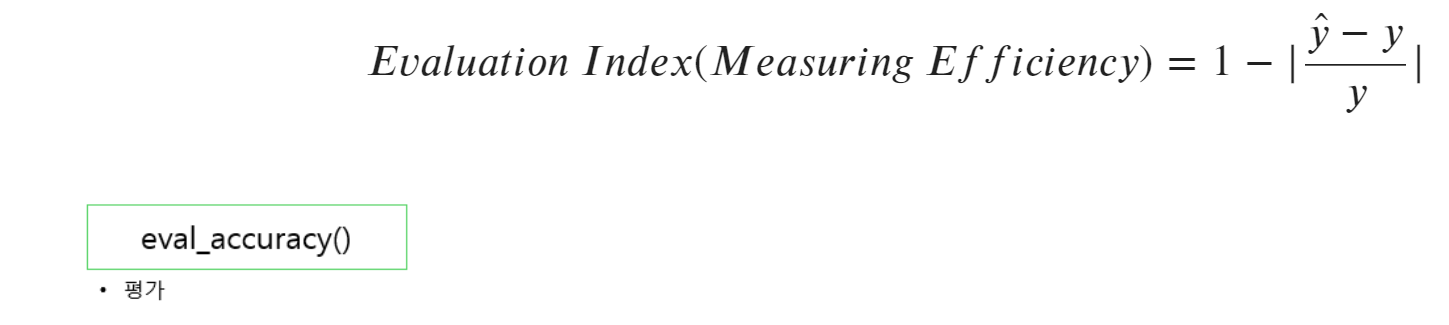

In [ ]:
def eval_accuracy(y_hat,y):
    mdiff = np.mean(np.abs((y_hat - y) /y))
    return 1- mdiff #머신러닝 편차


In [ ]:
acc = eval_accuracy(y_hat,train_y)
print("ACC :",acc*100)


ACC : 79.34211261711232


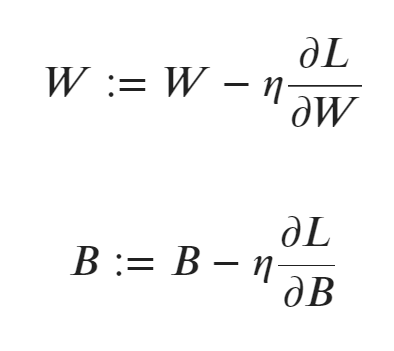

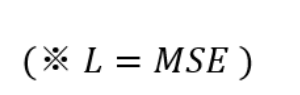

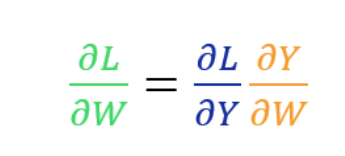

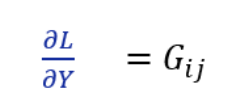

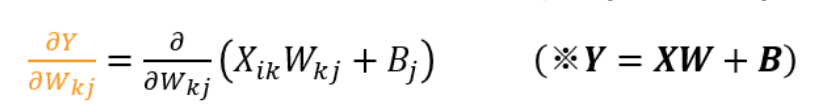

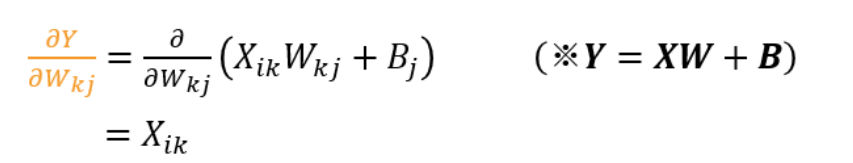

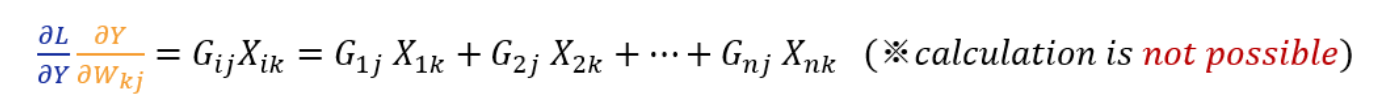

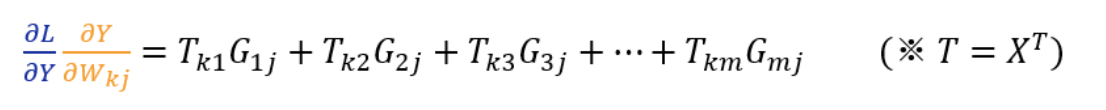

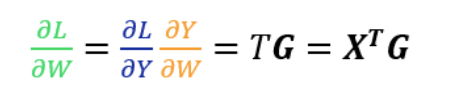

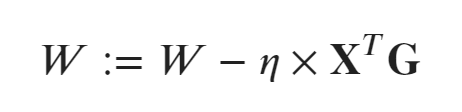

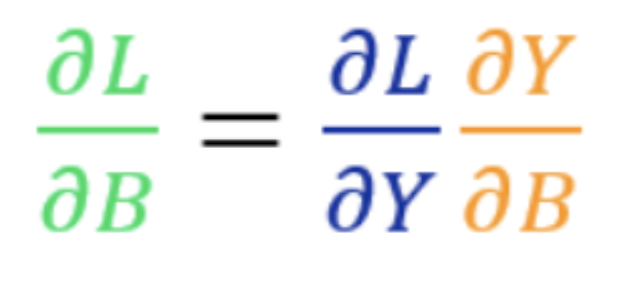

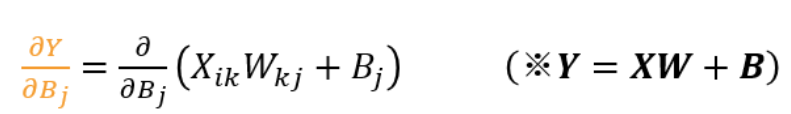

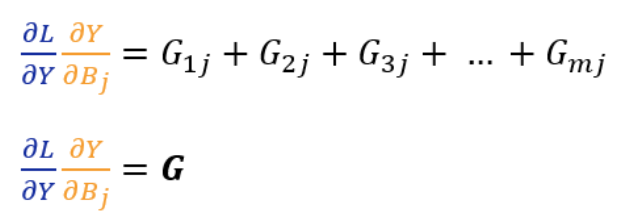

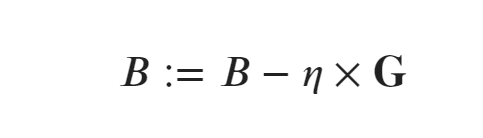

In [ ]:
def backprop_neuralnet(G_output,x):
  global weight, bias
  x_transpose = x.transpose()
  G_w = np.matmul(x_transpose, G_output)
  G_b = np.sum(G_output , axis=0)

  weight -= LEARNING_RATE * G_w
  bias   -= LEARNING_RATE * G_b

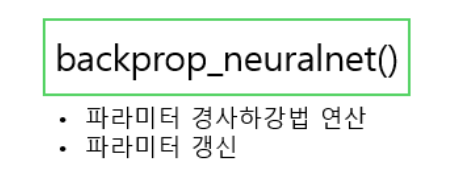

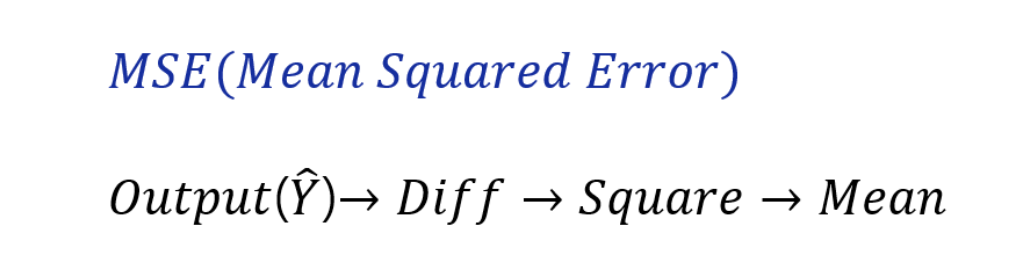

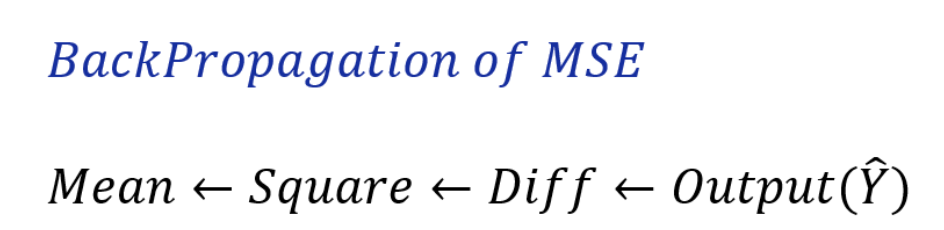

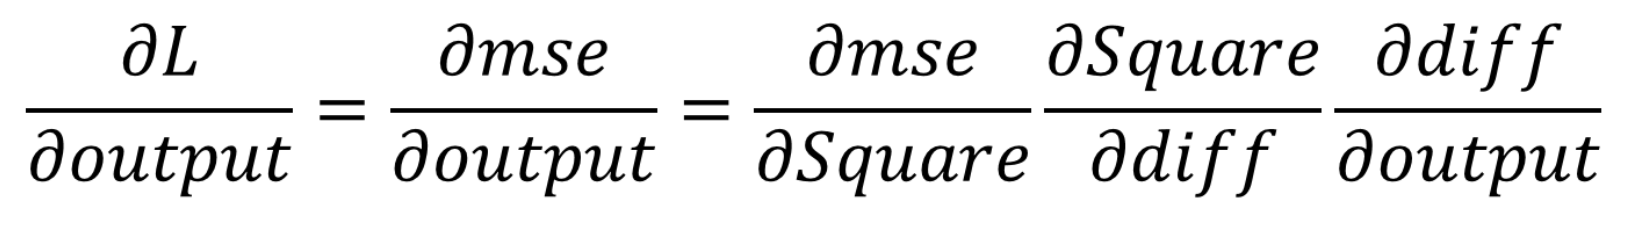

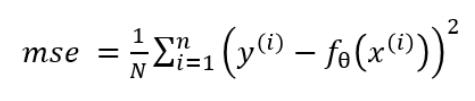

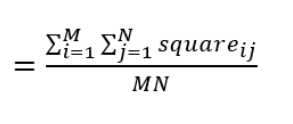

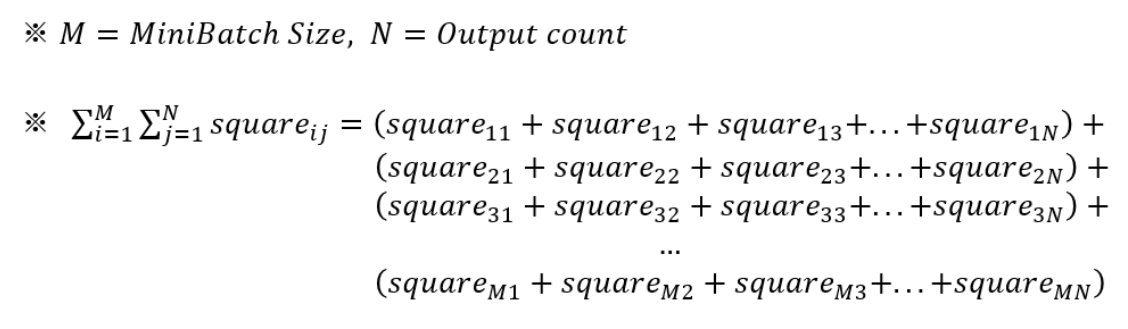

In [ ]:
diff = y_hat - train_y
square = np.square(diff)
print("square : \n", square)

print("diff.shape :" , diff.shape)

row_count_M = diff.shape[0]
col_count_N = diff.shape[1]
print("row_count_M : ", row_count_M)
print("col_count_N : ", col_count_N)

square : 
 [[ 0.02194349]
 [12.7469447 ]]
diff.shape : (2, 1)
row_count_M :  2
col_count_N :  1


In [ ]:
mse = (square[0][0] + square[1][0])/ (row_count_M * col_count_N)
print("MSE : ", mse)

MSE :  6.38444409833538


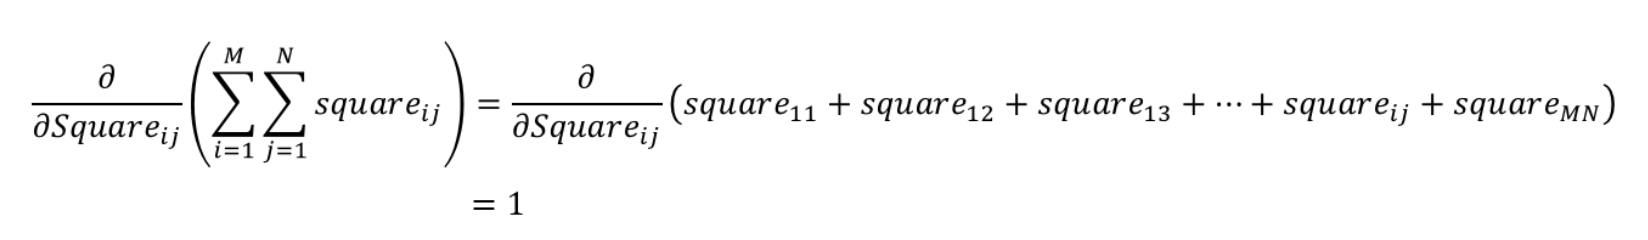

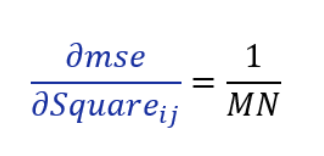

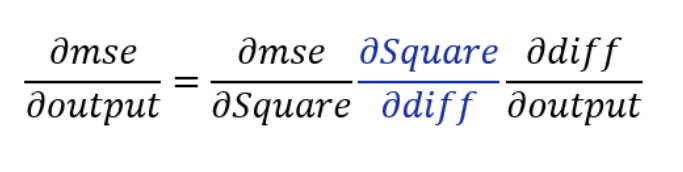

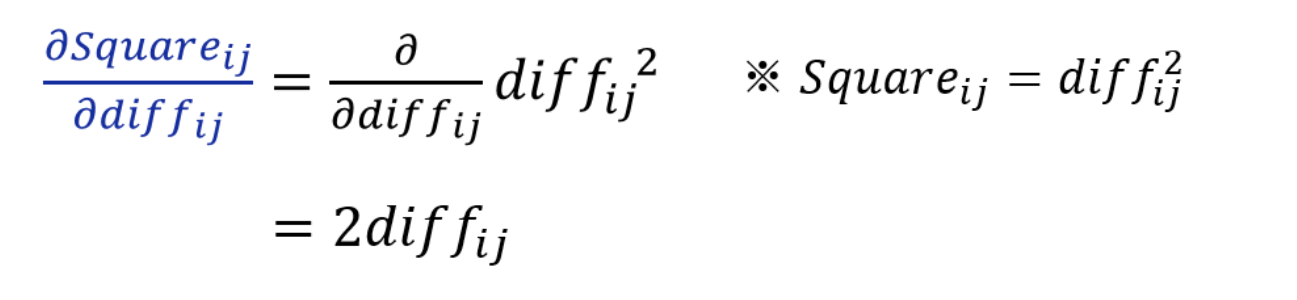

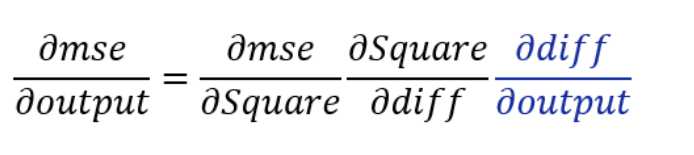

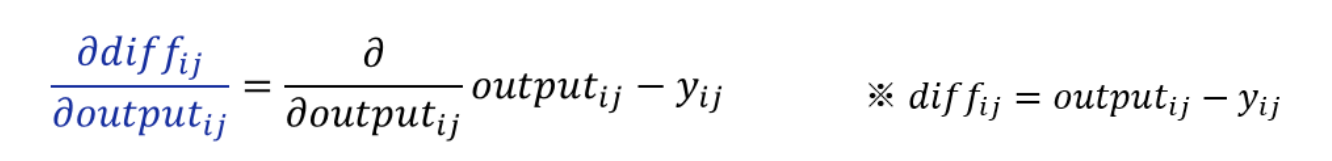

In [ ]:
def backprop_postproc(diff):
    M_N = diff.shape

    g_mse_square = np.ones(M_N) / np.prod(M_N)
    g_square_diff = 2*diff
    g_diff_output = 1

    G_diff = g_square_diff * g_mse_square
    G_output = g_diff_output * G_diff 

    return G_output

In [ ]:
def run_train(x,y):
    y_hat, aux_nn_x = forward_neuralnet(x)
    loss, aux_pp_diff = forward_postproc(y_hat,y)

    accuracy = eval_accuracy(y_hat,y)

    G_output = backprop_postproc(aux_pp_diff)
    backprop_neuralnet(G_output,aux_nn_x)

    return loss,accuracy    

In [ ]:
def run_test(x,y):
    y_hat ,_ = forward_neuralnet(x)
    accuracy = eval_accuracy(y_hat,y)

    return accuracy

In [ ]:
weight_initial, bias_initial, losses_mean_row, accs_mean_row, final_acc = main_execute(epoch_count = 1000, mb_size = 2, report = 50, train_ratio = 0.8)
    

Initial Weight Value : 
[[-0.00480861]
 [ 0.00276302]
 [ 0.02103765]
 [ 0.01004093]
 [-0.02319992]
 [ 0.00553448]
 [-0.01154682]
 [-0.01046075]
 [-0.03842237]
 [ 0.03037826]]
Initial Bias Value : 
[0.]
Epoch 50 : Train - Loss = 3.834, Accuracy = 0.847 / Test - Accuracy = 0.805
Epoch 100 : Train - Loss = 3.781, Accuracy = 0.853 / Test - Accuracy = 0.858
Epoch 150 : Train - Loss = 3.852, Accuracy = 0.848 / Test - Accuracy = 0.886
Epoch 200 : Train - Loss = 4.131, Accuracy = 0.829 / Test - Accuracy = 0.862
Epoch 250 : Train - Loss = 3.430, Accuracy = 0.865 / Test - Accuracy = 0.866
Epoch 300 : Train - Loss = 3.805, Accuracy = 0.869 / Test - Accuracy = 0.822
Epoch 350 : Train - Loss = 3.432, Accuracy = 0.867 / Test - Accuracy = 0.907
Epoch 400 : Train - Loss = 3.390, Accuracy = 0.881 / Test - Accuracy = 0.855
Epoch 450 : Train - Loss = 3.396, Accuracy = 0.852 / Test - Accuracy = 0.881
Epoch 500 : Train - Loss = 3.619, Accuracy = 0.868 / Test - Accuracy = 0.906
Epoch 550 : Train - Loss = 3.

In [ ]:
# 독립변수들이 가지고 있는 영향력
# 매번 값이 바뀜
print(f'weight : \n{weight}')
print(f'bias : \n{bias}')

weight : 
[[ 2.11698388]
 [-0.04322217]
 [ 1.23743499]
 [ 0.9468351 ]
 [ 1.38068431]
 [-5.81524346]
 [ 7.69768511]
 [ 9.87038533]
 [ 0.01211549]
 [-4.01123613]]
bias : 
[3.29220464]


In [ ]:
# 임시데이터
new_x = [0, 1, 0, 0.685,0.545, 0.18,1.42,0.674,0.392,0.5]

pred_Y,_ = forward_neuralnet(new_x)
print("pred_Y : ",pred_Y)

pred_Y :  [19.18577741]


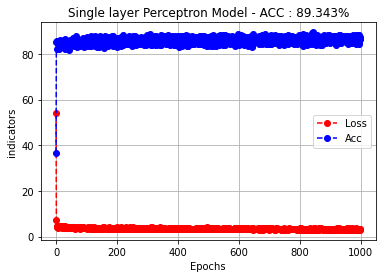

In [ ]:
# 시각화(accuracy의 변화값)

import matplotlib.pyplot as plt

plt.plot(losses_mean_row,'--o',color='red',label='Loss')
plt.plot(accs_mean_row,'--o',color='blue',label='Acc')

plt.title('Single layer Perceptron Model - ACC : {:.3f}%'.\
          format(final_acc * 100))
plt.xlabel('Epochs')
plt.ylabel('indicators')
plt.grid()
plt.legend()
plt.show()